<h2><center>Classification using Decision Trees</center></h2>

### Import standard libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
heart_df = pd.read_csv('/Users/anike/Notebooks/Datasets/heart-disease.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### About data

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


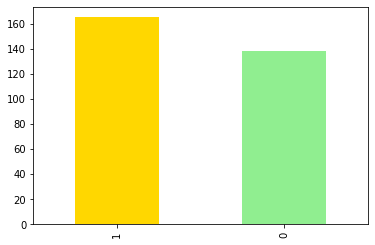

In [33]:
heart_df['target'].value_counts().plot(kind='bar', color=['gold', 'lightgreen']);

So as we can see, there are two different classes, 1 indicates that a patient has heart disease whereas 0 indicates he didn't had.<br><br>
Let's see if there are any null values in this dataset.

In [13]:
heart_df.isnull().values.any()

False

There are no null values.

### Correlation between attributes

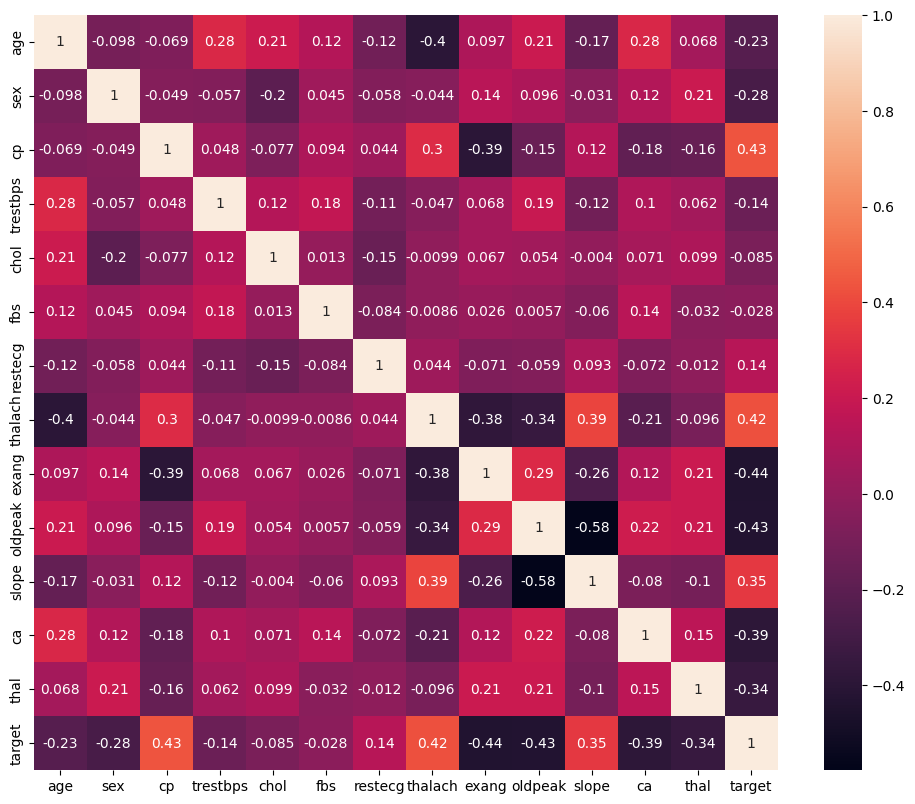

In [24]:
plt.figure(figsize=(12, 10), dpi=100)
corr_matrix = heart_df.corr()
sns.heatmap(corr_matrix, annot=True);

From the above correlation matrix, we can see few attributes have positive correlation among them whereas somehave negative correlation between them, like `chestpain`, `thalach` & `slope` has positive correlation with the `target` and attributes like `exang`, `oldpeak`, `ca` and `thal` have negative correlation with `target` variable.

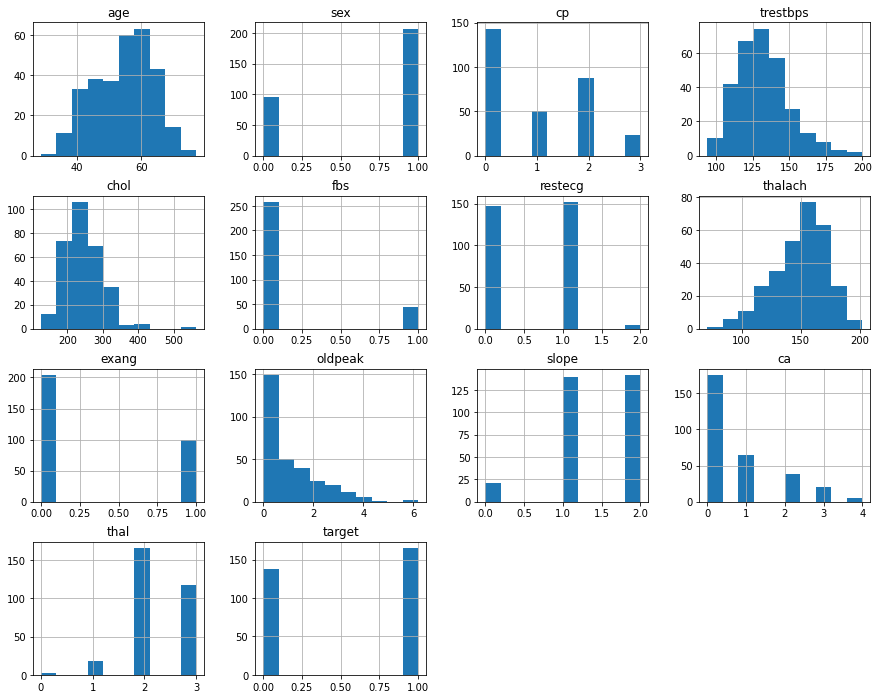

In [30]:
heart_df.hist(figsize=(15, 12))
plt.show()

### Modelling

In [31]:
from sklearn.model_selection import train_test_split

np.random.seed(10)

X = heart_df.drop('target', axis=1)
y = heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Shape of train set: ', X_train.shape)
print('Shape of test set: ', X_test.shape)
print('Shape of train labels: ', y_train.shape)
print('Shape of test labels: ', y_test.shape)

Shape of train set:  (242, 13)
Shape of test set:  (61, 13)
Shape of train labels:  (242,)
Shape of test labels:  (61,)


In [39]:
# Import all classification algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = {'LogisticRegression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'SVC': SVC(),
          'DecisionTree': DecisionTreeClassifier(),}

model_scores = {}

for name, model in models.items():
        
    score = {}
    # Fit the model to the data
    model.fit(X_train, y_train)
    
    # Evaluate model on test data and store into model_scores
    score['Train score'] = round(model.score(X_train, y_train), 2)
    score['Test score'] = round(model.score(X_test, y_test), 2)
    model_scores[name] = score
        
model_scores

{'LogisticRegression': {'Train score': 0.86, 'Test score': 0.77},
 'KNN': {'Train score': 0.78, 'Test score': 0.59},
 'RandomForestClassifier': {'Train score': 1.0, 'Test score': 0.79},
 'SVC': {'Train score': 0.65, 'Test score': 0.59},
 'DecisionTree': {'Train score': 1.0, 'Test score': 0.77}}

In [42]:
model_compare = pd.DataFrame(model_scores.values(), index=model_scores.keys())
model_compare

,Train score,Test score
LogisticRegression,0.86,0.77
KNN,0.78,0.59
RandomForestClassifier,1.00,0.79
SVC,0.65,0.59
DecisionTree,1.00,0.77


### Comparing Decision Trees with other Classifiers

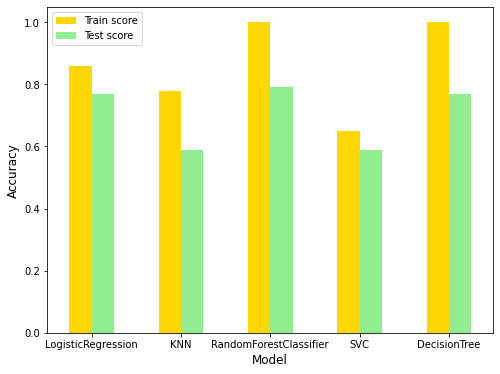

In [44]:
model_compare.plot(kind='bar', figsize=(8, 6), color=['gold', 'lightgreen'])
plt.xlabel('Model', size=12)
plt.ylabel('Accuracy', size=12)
plt.xticks(rotation=0);

### Making Predictions

In [45]:
y_preds = models['DecisionTree'].predict(X_test)
y_preds[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print('Accuracy: ', round(accuracy_score(y_test, y_preds), 2))
print('Precision: ', round(precision_score(y_test, y_preds), 2))
print('Recall: ', round(recall_score(y_test, y_preds), 2))

Accuracy:  0.77
Precision:  0.69
Recall:  0.85


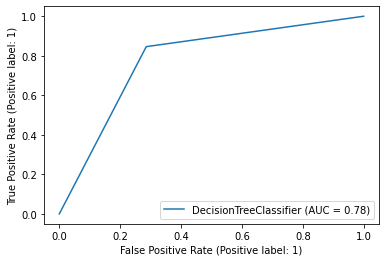

In [47]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(models['DecisionTree'], X_test, y_test);

In [53]:
# confusion matrix
confusion_matrix(y_test, y_preds)

array([[25, 10],
       [ 4, 22]], dtype=int64)

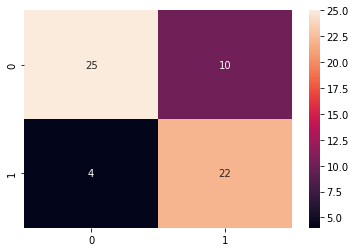

In [54]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True);